In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
goku_img = cv2.imread("assets/goku.png")
type(goku_img)

numpy.ndarray

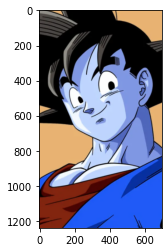

In [3]:
plt.imshow(goku_img)

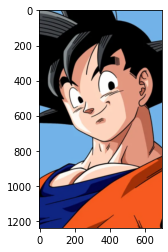

In [4]:
goku_img = cv2.imread("assets/goku.png")
R_channel = np.array(goku_img[:, :, 2])
B_channel = np.array(goku_img[:, :, 0])
goku_img[:, :, 0] = R_channel
goku_img[:, :, 2] = B_channel

plt.imshow(goku_img)

___
## Exercício
- Pegue uma imagem, rotacione ela e retorne um centro dela cropado de acordo com as posições que usuário indicar
___

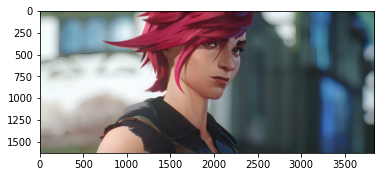

In [5]:
img_vi = cv2.cvtColor(cv2.imread("assets/vi.jpg"), cv2.COLOR_BGR2RGB)
plt.imshow(img_vi)

In [6]:
def rotate_and_crop_img(img, angle, scale=1.0, rot_pos=None, offset=None):
    height, width = img.shape[0], img.shape[1]
    
    # Neste caso, centro de rotação vai ser o centro da imagem
    if rot_pos is None:
        rot_pos = (width//2, height//2)
    
    rot_matrix = cv2.getRotationMatrix2D(rot_pos, angle, scale)
    
    img_rot = cv2.warpAffine(img, # imagem original
                             rot_matrix, # matriz de transformação linear
                             (width, height) # dimensão da nova imagem
                            )
    if offset is None:
        offset = (300, 300)

    crop_vi = img_rot[rot_pos[1] - offset[1]:rot_pos[1] + offset[1], rot_pos[0] - offset[0]:rot_pos[0] + offset[0], :]    
    print(width,height)
    return crop_vi

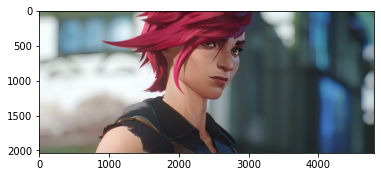

In [7]:
img_vi_res = cv2.resize(img_vi, None, fx=1.25, fy=1.25, interpolation=cv2.INTER_CUBIC)
plt.imshow(img_vi_res)

4800 2034


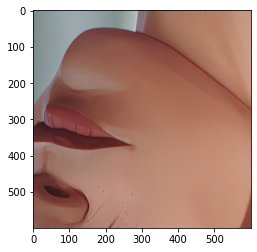

In [8]:
rot_and_crop_vi = rotate_and_crop_img(img_vi_res, 180)
# print(rot_and_crop_vi)
plt.imshow(rot_and_crop_vi)

# Exercício:
- Faça uma função que insira o retângulo em todas as formas da imagem anterior
___

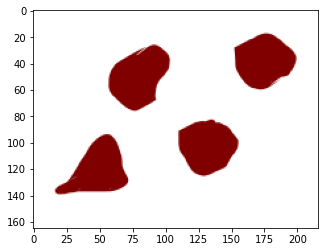

In [9]:
formas_2 = cv2.imread("assets/formas_2.png")
plt.imshow(formas_2, cmap="gray")

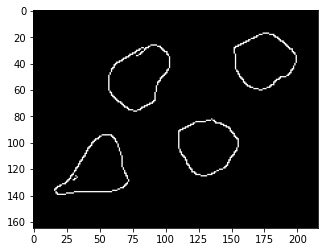

In [10]:
formas_2_can = cv2.Canny(formas_2, 50, 240)
plt.imshow(formas_2_can, cmap="gray")

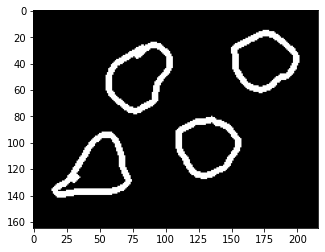

In [11]:
contours, hier = cv2.findContours(formas_2_can, # imagens que vai buscar os contornos
                                  cv2.RETR_TREE, # método de contorno (existem vários)
                                  cv2.CHAIN_APPROX_SIMPLE # uma maneira de reduzir a quantidade de contornos. Se for None, pega tudo
                                 )

forma_cnt = cv2.drawContours(np.zeros_like(formas_2_can), # definindo a imagem onde vai ser desenhado
                             contours, # passando os contornos
                             -1, # índice do contorno que vai ser desenhado (-1 desenha tudo)
                             (255,255,255), # cor do contorno 
                             3 # grossura da linha
                            )

plt.imshow(forma_cnt, cmap="gray")

In [12]:
def find_contours_min(contours, a_min):
    for k, cnt in enumerate(contours):
        c_area = cv2.contourArea(cnt)
        if c_area > a_min:
            print(f"contours[{k}]: {c_area}")
            
find_contours_min(contours, 1000)

contours[0]: 1425.5
contours[1]: 1385.5
contours[3]: 1417.5
contours[4]: 1375.5
contours[5]: 1562.5
contours[6]: 1510.0
contours[7]: 1434.5
contours[8]: 1391.5


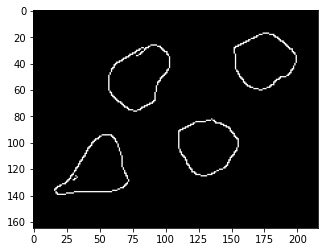

In [13]:
formas_2_can = cv2.Canny(formas_2, 50, 240)
plt.imshow(formas_2_can, cmap="gray")

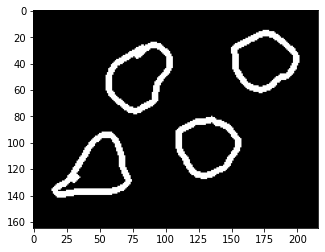

In [14]:
contours, hier = cv2.findContours(formas_2_can, # imagens que vai buscar os contornos
                                  cv2.RETR_TREE, # método de contorno (existem vários)
                                  cv2.CHAIN_APPROX_SIMPLE # uma maneira de reduzir a quantidade de contornos. Se for None, pega tudo
                                 )

forma_cnt = cv2.drawContours(np.zeros_like(formas_2_can), # definindo a imagem onde vai ser desenhado
                             contours, # passando os contornos
                             -1, # índice do contorno que vai ser desenhado (-1 desenha tudo)
                             (255,255,255), # cor do contorno 
                             3 # grossura da linha
                            )

plt.imshow(forma_cnt, cmap="gray")

In [15]:
find_contours_min(contours, 1000)

contours[0]: 1425.5
contours[1]: 1385.5
contours[3]: 1417.5
contours[4]: 1375.5
contours[5]: 1562.5
contours[6]: 1510.0
contours[7]: 1434.5
contours[8]: 1391.5


In [16]:
peri = cv2.arcLength(contours[0], # o contorno
                     True # se True, indica que é uma forma fechada
                    )
peri

169.7817441225052

In [17]:
approx_cnt = cv2.approxPolyDP(contours[0], # contorno
                              0.1*peri, # precisao da aproximação
                              True # se True, indica que é uma forma fechada
                             )
approx_cnt

array([[[ 59,  94]],

       [[ 18, 139]],

       [[ 71, 131]]], dtype=int32)

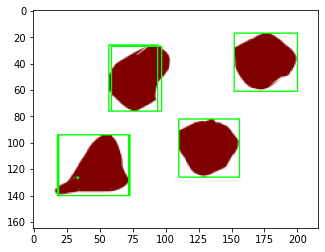

In [18]:

all_cnt = list()
formas_final = formas_2

for cnt in contours:
  approx_cnt = cv2.approxPolyDP(cnt, # contorno
                              0.1*peri, # precisao da aproximação
                              True # se True, indica que é uma forma fechada
                             )
  all_cnt.append(approx_cnt)

for cnt in all_cnt:
  x, y, w, h = cv2.boundingRect(cnt)
  formas_final = cv2.rectangle(formas_final.copy(), (x,y), (x+w, y+h), (0, 255, 0), 1)

plt.imshow(formas_final)

___

# Exercício
- Aplique um threshold usando o resultado da operação de BlackHat para obter um mascara dos caracteres das placas

___

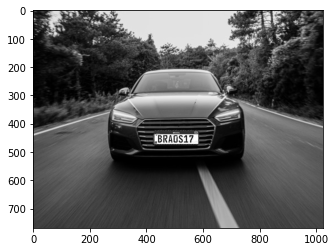

In [19]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

carro = cv2.imread("assets/carro.jpg")
carro = cv2.cvtColor(carro, cv2.COLOR_BGR2GRAY)
plt.imshow(carro, cmap="gray")

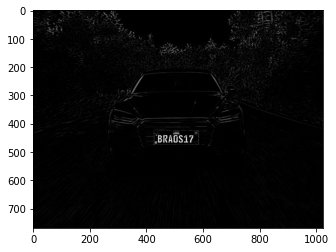

In [20]:
est = cv2.getStructuringElement(cv2.MORPH_RECT, (7,5))
carro_bh = cv2.morphologyEx(carro, cv2.MORPH_BLACKHAT, est)
plt.imshow(carro_bh, cmap="gray")

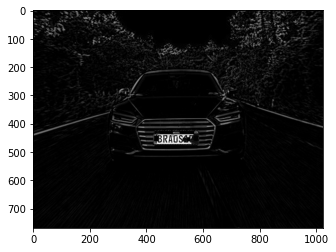

In [21]:
est = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
carro_th = cv2.morphologyEx(carro, cv2.MORPH_TOPHAT, est)
plt.imshow(carro_th, cmap="gray")

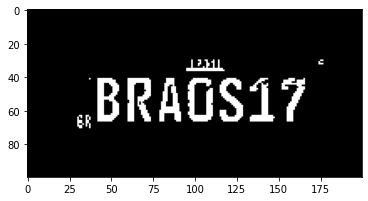

In [22]:
est = cv2.getStructuringElement(cv2.MORPH_RECT, (7,5))
carro_lucas = cv2.morphologyEx(carro, cv2.MORPH_BLACKHAT, est)

thresh = 140
ret,thresh = cv2.threshold(carro_lucas, thresh,255,cv2.THRESH_BINARY)

crop_plate = thresh[400:500, 400:600]

plt.imshow(crop_plate, cmap="gray")

___
# Exercício
- Volte no exercício anterior e aplique, crie uma mascara para extrair só a placa do carro
___


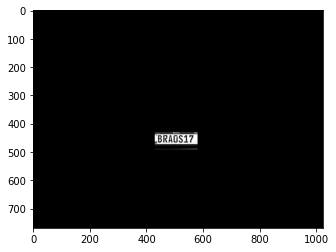

In [23]:
carro = cv2.imread("assets/carro.jpg")
carro = cv2.cvtColor(carro, cv2.COLOR_BGR2GRAY)
mask = cv2.rectangle(np.zeros_like(carro), (430, 430), (580, 490), (255, 255, 255), thickness=cv2.FILLED)

new_img = cv2.bitwise_and(carro, mask)

plt.imshow(new_img, cmap="gray")

____
# Exercício
- Repita o exercício acima usando os métodos `cv2.split()` e `cv2.merge()`
___

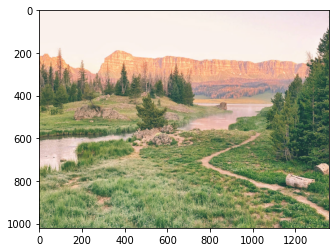

In [36]:
natureza = cv2.cvtColor(cv2.imread("assets/natureza.jpg"), cv2.COLOR_BGR2RGB)
plt.imshow(natureza)

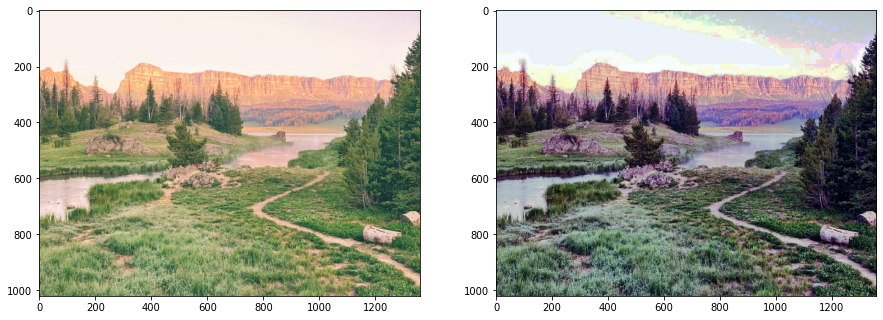

In [38]:
r, g, b = cv2.split(natureza)

r_eq = cv2.equalizeHist(r)
g_eq = cv2.equalizeHist(g)
b_eq = cv2.equalizeHist(b)

img_eq = cv2.merge((r_eq, g_eq,b_eq))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,15))
ax[0].imshow(natureza)
ax[1].imshow(img_eq)
